In [712]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import mplfinance as mpf 
import numpy as np


start=dt.datetime(2020,4,1)
end=dt.datetime.today()

n = input("Want to enter Manually(y/Y): ")

if(n == 'y' or n == 'Y'):
   stocksName = list(map(str,input().split()))

else:
    stocksName = ["RELIANCE","INFY","NDTV","I"]

stocksData=[]
for stock in stocksName:
    stocksData.append(yf.download(stock+".NS",start,end))

for stockData in stocksData:
    print(stockData)


Want to enter Manually(y/Y):  Y
  HEROMOTOCO SBIN NDTV IRCTC


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-04-01  1590.099976  1647.349976  1565.000000  1639.650024  1497.414062   
2020-04-03  1610.050049  1623.000000  1543.150024  1582.050049  1444.810547   
2020-04-07  1630.000000  1789.000000  1623.650024  1769.199951  1615.725708   
2020-04-08  1702.000000  1883.800049  1700.000000  1821.650024  1663.625854   
2020-04-09  1879.150024  2013.400024  1853.000000  1990.900024  1818.193726   
...                 ...          ...          ...          ...          ...   
2024-06-11  5730.000000  5846.399902  5705.000000  5786.600098  5786.600098   
2024-06-12  5800.000000  5859.000000  5776.600098  5790.200195  5790.200195   
2024-06-13  5820.200195  5840.000000  5731.000000  5816.000000  5816.000000   
2024-06-14  5823.000000  5864.750000  5761.600098  5804.200195  5804.200195   
2024-06-18  5824.000000  5894.549805  5736.700195  5

In [714]:
import pandas as pd
# stocks = pd.concat([stocksData[0]["Adj Close"],stocksData[1]["Adj Close"],stocksData[2]["Adj Close"],stocksData[3]["Adj Close"]],axis=1)

stocks=[]
stocks = pd.concat([data["Adj Close"] for data in stocksData], axis=1)


stocks.columns= stocksName
print(stocks)

# stocksAdjClosePrice.to_excel("Stocks.xlsx")

             HEROMOTOCO        SBIN        NDTV        IRCTC
Date                                                        
2020-04-01  1497.414062  175.589142   24.299999   202.218201
2020-04-03  1444.810547  165.188385   24.549999   212.322708
2020-04-07  1615.725708  175.447937   25.049999   222.936905
2020-04-08  1663.625854  172.247711   25.200001   234.080322
2020-04-09  1818.193726  176.718628   25.500000   245.782364
...                 ...         ...         ...          ...
2024-06-11  5786.600098  835.549988  237.389999  1020.049988
2024-06-12  5790.200195  839.099976  233.550003  1026.949951
2024-06-13  5816.000000  843.900024  238.029999  1017.549988
2024-06-14  5804.200195  839.200012  235.149994  1018.200012
2024-06-18  5754.850098  844.900024  232.639999  1032.400024

[1041 rows x 4 columns]


In [25]:
#Simple Returns

In [716]:
Returns=stocks/stocks.shift(1)


In [718]:
#Log Return
logreturns=np.log(Returns)
logreturns



,HEROMOTOCO,SBIN,NDTV,IRCTC
Date,,,,
2020-04-01,NaN,NaN,NaN,NaN
2020-04-03,-0.035761,-0.061060,0.010236,0.048760
2020-04-07,0.111806,0.060256,0.020162,0.048781
2020-04-08,0.029215,-0.018409,0.005970,0.048776
2020-04-09,0.088844,0.025625,0.011834,0.048782
...,...,...,...,...
2024-06-11,0.011192,0.004498,-0.023151,0.042199
2024-06-12,0.000622,0.004240,-0.016308,0.006742
2024-06-13,0.004446,0.005704,0.019001,-0.009195


In [720]:
no_of_portfolio=10000
stocksLength = len(stocksName)

Weights=np.zeros((no_of_portfolio,stocksLength))#this show array has no_of_portfolio (2) rows and 4 column.Making 2D array)
expected_return=np.zeros(no_of_portfolio)
expected_volatility=np.zeros(no_of_portfolio)
Sharpe_Ratio=np.zeros(no_of_portfolio)



Average_Return=logreturns.mean()
sigma=logreturns.cov()
risk_free_rate = 0.0013


for k in range(no_of_portfolio):
#Generate Random Weights(the function below is assigning weights to portfolio randomly)
    w=np.array(np.random.random(stocksLength))
    w=w/np.sum(w)
    Weights[k,:]=w
    #Expected Log Return
    expected_return[k]=np.sum(Average_Return*w)#(it is calculating the weighted average of portfolio generated)
    #Standard Deviation/Volatility of Portfolio
    expected_volatility[k]=np.sqrt(np.dot(w.T,np.dot(sigma,w)))#This is Std. Deviation of portfolio
    risk_free_rate_daily = (risk_free_rate)*1
    #Sharpe Ratio
    Sharpe_Ratio[k]=(expected_return[k] - risk_free_rate_daily)/expected_volatility[k]
    print(Sharpe_Ratio[k])
    
   
    
    
    

    
    



0.013299510500237897
0.013098072906134784
0.01678558977334231
0.01939048607885644
0.022727691314441124
0.024136687377654772
0.01924733335837057
0.017862701615878503
0.022218781208651596
0.02141738829009398
0.024235036117730552
0.02316519477353054
0.022512259671435584
0.0184163581064764
0.020836807542294007
0.022468421824147135
0.02074926834947376
0.02297909698331093
0.017334291718456095
0.012344870543873048
0.021244304128476665
0.020342325283440744
0.014121561686612393
0.023657302680630276
0.024245649774852003
0.01914400579133047
0.014750682738976987
0.016364680583831268
0.019160928911630543
0.020293795613340496
0.019672762987904237
0.022826076744058614
0.015919163836856806
0.022922420076161104
0.020882308775354498
0.019738221085919605
0.020409810640442613
0.02279065926885593
0.01142669059250162
0.01897308178083743
0.017540916124391334
0.015363792942071278
0.01312311706581599
0.022581926276461422
0.020056777455789293
0.01678536064377085
0.020948645388793607
0.012805730885182807
0.01725

Text(0.5, 1.0, 'Expected Return')

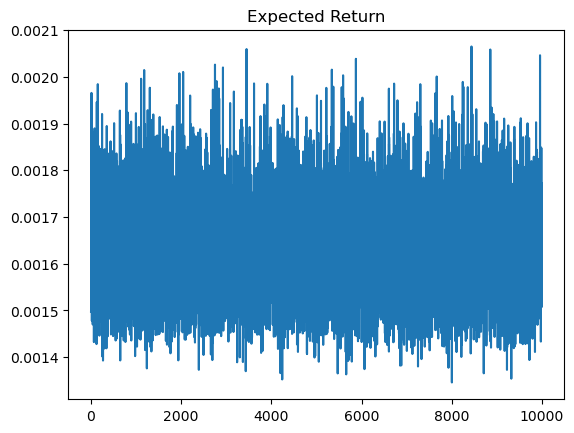

In [722]:
plt.plot(expected_return)
plt.title("Expected Return")

In [724]:
#Sharpe Ratio Maximization
maxIndex=Sharpe_Ratio.argmax()
optimal_weights=Weights[maxIndex,:]
optimal_return = expected_return[maxIndex]
optimal_volatility = expected_volatility[maxIndex]
print("Optimal Weights:", optimal_weights)
print("Optimal Return:", optimal_return)
print("Optimal Volatility:", optimal_volatility)



Optimal Weights: [0.00312616 0.24129096 0.51736263 0.23822025]
Optimal Return: 0.001865763059013144
Optimal Volatility: 0.022907919630251797


<function matplotlib.pyplot.show(close=None, block=None)>

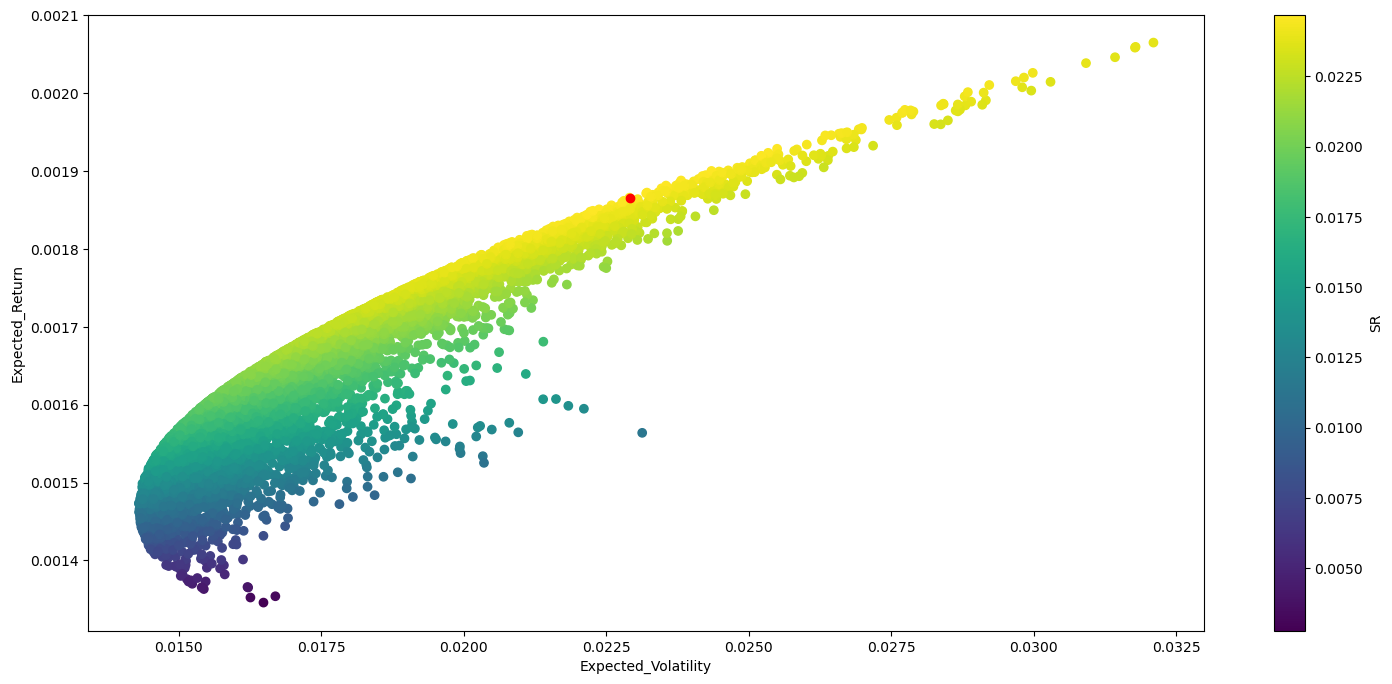

In [726]:
#Scatter Plot Retrn Vs volatility
plt.figure(figsize=(18,8))
plt.scatter(expected_volatility,expected_return,c=Sharpe_Ratio)
plt.colorbar(label="SR")
plt.xlabel("Expected_Volatility")
plt.ylabel("Expected_Return")
plt.scatter(expected_volatility[maxIndex],expected_return[maxIndex],c="Red")
plt.show



In [728]:
import numpy as np
from scipy.optimize import minimize

# Define the risk-free rate
risk_free_rate = 0.0013



# Define the negative Sharpe Ratio function
def negativeSR(w):
    w = np.array(w)
    R = np.sum(Average_Return * w)
    V = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    Rf = risk_free_rate
    SR = (R - Rf) / V
    return -1 * SR

# Define the constraint that weights must sum to 1
def CheckSum(w):
    return np.sum(w) - 1

# Initial guess for the weights
w0 = [0.25, 0.25, 0.25, 0.25]

# Bounds for the weights
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

# Constraints dictionary
constraints = {"type": "eq", "fun": CheckSum}

# Perform the optimization
w_opt = minimize(negativeSR, w0, method="SLSQP", bounds=bounds, constraints=constraints)

# Output the optimized weights and the optimized negative Sharpe Ratio
optimized_weights = w_opt.x
optimized_negative_sharpe_ratio = w_opt.fun

optimized_weights, optimized_negative_sharpe_ratio


(array([0.        , 0.23339774, 0.55212792, 0.21447434]),
 -0.024733995800408318)

In [738]:
returns=np.linspace(0.0010,0.0020,50)
Volatility_opt=[]
def minvolatility(w):
    w=np.array(w)
    V=np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    return V

def getReturn(w):
    w=np.array(w)
    R=np.sum(Average_Return*w)
    return R


    

for R in returns:
#Find the best Volatility
    constraints=({"type":"eq","fun":CheckSum},{"type":"eq","fun":lambda w: getReturn(w)-R})
    opt=minimize(minvolatility,w0,method="SLSQP",bounds=bounds,constraints=constraints)
    #Save my Volatility
    Volatility_opt.append(opt["fun"])

    

In [740]:
Volatility_opt

[0.018028428270254613,
 0.01802842827025215,
 0.018028428270252844,
 0.018028428270252046,
 0.018028428270252046,
 0.018028428270252042,
 0.01802842827025246,
 0.018028428270253756,
 0.018028428270251116,
 0.0180284282702512,
 0.018028428270252046,
 0.018028428270252434,
 0.018028428270252375,
 0.01802842827025213,
 0.018028428270252153,
 0.017405755481402062,
 0.016464811331475225,
 0.015729281048391348,
 0.015167168860778851,
 0.014763600620025163,
 0.014552498143826587,
 0.014410505321421331,
 0.01432729188909366,
 0.01430085794353018,
 0.014332202771080002,
 0.014420943847958004,
 0.014566009257417651,
 0.014765677878287196,
 0.0150176355486738,
 0.01531904293796307,
 0.015666659715779668,
 0.016057152753222708,
 0.016487672042233427,
 0.01695590527429135,
 0.01745960501036386,
 0.017996011823166097,
 0.0185621192883752,
 0.01915505671729952,
 0.01977223948932333,
 0.020412740939578167,
 0.021092388337349843,
 0.021812782852672522,
 0.022570360923201575,
 0.023362238555840926,
 0.0

Stocks in Portfolio:  ['HEROMOTOCO', 'SBIN', 'NDTV', 'IRCTC']
Optimal Weights: [0.00312616 0.24129096 0.51736263 0.23822025]
Optimal Return: 0.001865763059013144
Optimal Volatility: 0.022907919630251797
Optimal Sharpe Ratio: 0.024697269247706256


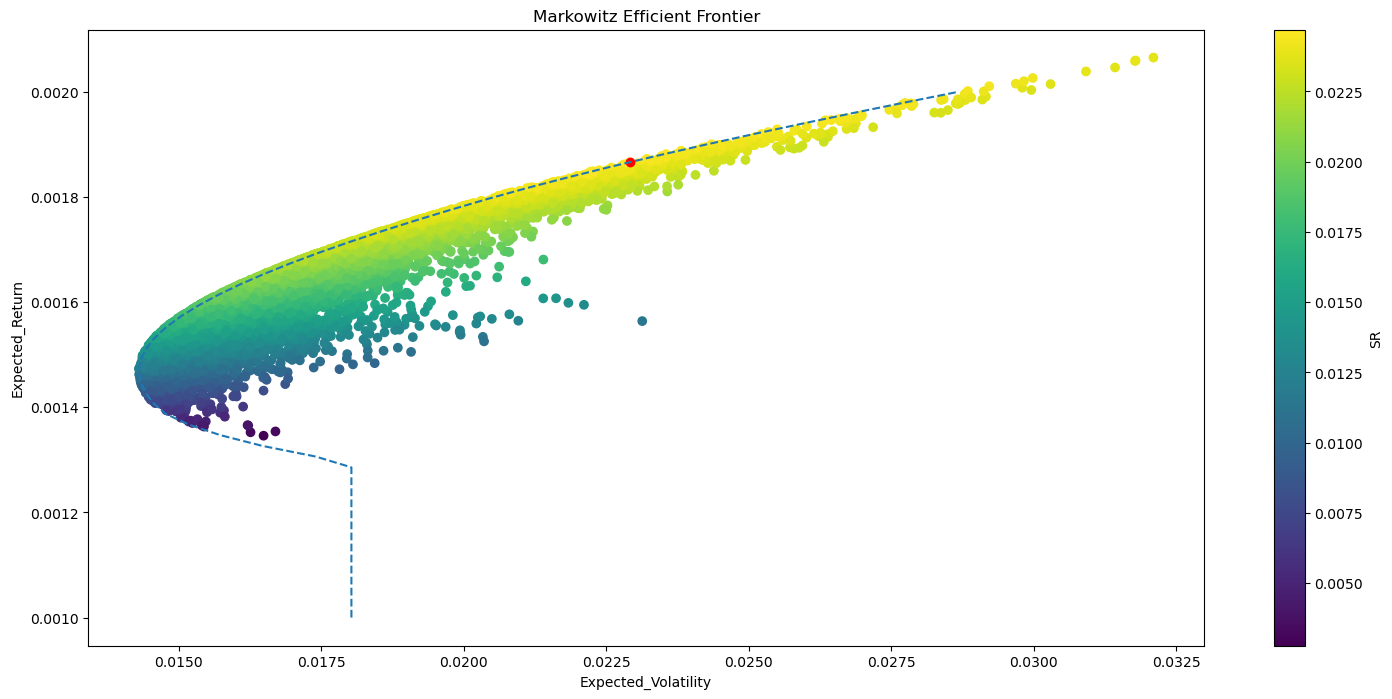

In [742]:
plt.figure(figsize=(18,8))
plt.scatter(expected_volatility,expected_return,c=Sharpe_Ratio)
plt.colorbar(label="SR")
plt.xlabel("Expected_Volatility")
plt.ylabel("Expected_Return")
plt.scatter(expected_volatility[maxIndex],expected_return[maxIndex],c="Red")
plt.plot(Volatility_opt,returns,"--")
plt.show
plt.title("Markowitz Efficient Frontier")
maxIndex=Sharpe_Ratio.argmax()
optimal_weights=Weights[maxIndex,:]
optimal_return = expected_return[maxIndex]
optimal_volatility = expected_volatility[maxIndex]
optimal_Sharpe_Ratio=Sharpe_Ratio[maxIndex]
print("Stocks in Portfolio: ",stocksName)
print("Optimal Weights:", optimal_weights)
print("Optimal Return:", optimal_return)
print("Optimal Volatility:", optimal_volatility)
print("Optimal Sharpe Ratio:", optimal_Sharpe_Ratio)


